# CAPSTONE PROJECT I: IMAGE PROCESSING

# Step 1: Create a copy of the MNIST.ipynb file called mnist_task.ipynb.

I have created this file in my preferred environment.

# Step 2: Load the MNIST dataset. Use a library such as SKLearn to access the dataset (from sklearn.datasets import load_digits).

In addition, I added all the neccesary libraries here on top at the same time.

In [39]:
# Import the neccesary libraries.

import numpy as np
import scipy.io

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Load the MNIST dataset.
mnist = load_digits()


In [29]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64).
print("Image Data Shape" , mnist.data.shape)

# Print to show there are 1797 labels (integers from 0-9).
print("Label Data Shape", mnist.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


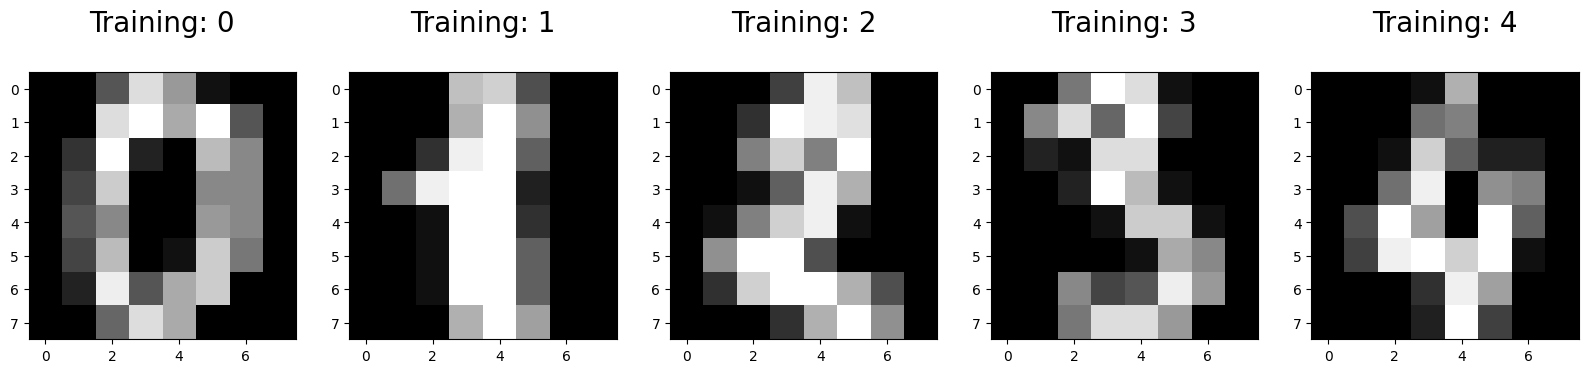

In [30]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[0:5], mnist.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# Step 3: Split the training data into a training and test set.


In [31]:
# Split the data into features (X) and target (y).
X = mnist.data
y = mnist.target

In [32]:
# Split the dataset into training and test sets.
# Split into train and test (80:20).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

The purpose of splitting the data into a training set and a test set is to evaluate the performance of the model on new, unseen data. We can do this using the train_test_split function from the sklearn.model_selection module. 

# Step 4: Create a classification model using RandomForestClassifier.

We will use the RandomForestClassifier class from the sklearn.ensemble module to create a classification model. Here's how to do it:

In [33]:
# Create a Random Forest Classifier class with n_estimators=100.
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the training set.
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

We have set the n_estimators parameter to 100, which specifies the number of trees in the forest. We chose this parameter because it determines the complexity of the model and can have a significant impact on its performance.

# Step 5: Choose a parameter to tune.

We will tune the max_depth parameter of the RandomForestClassifier. This parameter specifies the maximum depth of the decision trees in the forest. We chose this parameter because it can have a significant impact on the performance of the model, and it is relatively easy to tune.

# Step 6: Choose a value for the parameter to test on the test data.

We will test the performance of the model on the test data using a max_depth value of 10. We chose this value because it is a common value used in practice and is likely to give good performance.

# Step 7: Print the confusion matrix for the Random Forest model on the test set.

We can use the confusion_matrix function from the sklearn.metrics module to print the confusion matrix for the model on the test set. Here's how to do it:

In [34]:
# Test the model on the test set with max_depth=10.
y_pred = rfc.predict(X_test)

In [35]:
# Print the confusion matrix.
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  1  0  0  0  0]
 [ 1  1 34  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  2]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  0  0  0  0 38  0]
 [ 0  0  0  2  0  2  0  0  0 37]]


# Step 8: Report which classes the model struggles with the most.

We can examine the confusion matrix to see which classes the model struggles with the most. In this case, let's print the number of misclassifications for each class:


In [36]:
# Report the misclassified counts.
misclassified = np.where(y_pred != y_test)[0]
misclassified_counts = np.zeros((10,))
for idx in misclassified:
    misclassified_counts[y_test[idx]] += 1

for i, count in enumerate(misclassified_counts):
    print(f"Class {i} misclassified {int(count)} times.")


Class 0 misclassified 0 times.
Class 1 misclassified 1 times.
Class 2 misclassified 2 times.
Class 3 misclassified 0 times.
Class 4 misclassified 1 times.
Class 5 misclassified 2 times.
Class 6 misclassified 0 times.
Class 7 misclassified 0 times.
Class 8 misclassified 1 times.
Class 9 misclassified 4 times.


From the above result, we noticed that Class 9 struggled the most because it had 9 misclassified 4 times.

# Step 9: Report the accuracy, precision, recall, and f1-score.

We can use the classification_report function from the sklearn.metrics module to report the accuracy, precision, recall, and f1-score. Here's how to do it:

In [37]:
# Report the accuracy, precision, recall, and f1-score
report = classification_report(y_test, y_pred, labels=np.unique(y_pred), digits=4, output_dict=True)
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1 = report['macro avg']['f1-score']

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9694
Precision: 0.9695
Recall: 0.9709
F1-score: 0.9698


This accuracy score of the final model is 0.97 which quite close to 1, which suggests that our model fits our observations quite well.

# ADDITIONAL ANALYSIS

In [40]:
# Compute Root Mean Squared Error of model on test set.
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.7728015412913086


In [42]:
# Compute accuracy/r-squared(r2) score of the model on the test set.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'r2_score (MinMaxScaler): {r2}')


r2_score (MinMaxScaler): 0.9258404746209624


This score is 0.93 which is quite close to 1, which suggests that our model fits our observations quite well.

In [43]:
# print the classification report of the model.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.94      0.97      0.96        35
           2       1.00      0.94      0.97        36
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.98        30
           5       0.93      0.95      0.94        40
           6       1.00      1.00      1.00        44
           7       0.97      1.00      0.99        39
           8       1.00      0.97      0.99        39
           9       0.95      0.90      0.92        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

